In [75]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np  
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler



Data Inspection

In [4]:
#load the data
df=pd.read_csv('heart_disease_uci.csv')

In [5]:
#view first few rows of the data
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [6]:
#data type inspection

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
# Exploring the shape of the dataset in different ways

# Basic shape (rows, columns)
print("Basic shape of the dataset:", df.shape)

# Number of rows
print("Number of rows in the dataset:", df.shape[0])

# Number of columns
print("Number of columns in the dataset:", df.shape[1])


Basic shape of the dataset: (920, 16)
Number of rows in the dataset: 920
Number of columns in the dataset: 16


In [8]:
#summary information on the dataset
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
#there are 920 entries and 16 features to consider
#next will analyze missing values in the dataset


In [10]:
df.isnull().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [11]:
#its evident that ca, thal and slope have missing values that are significant

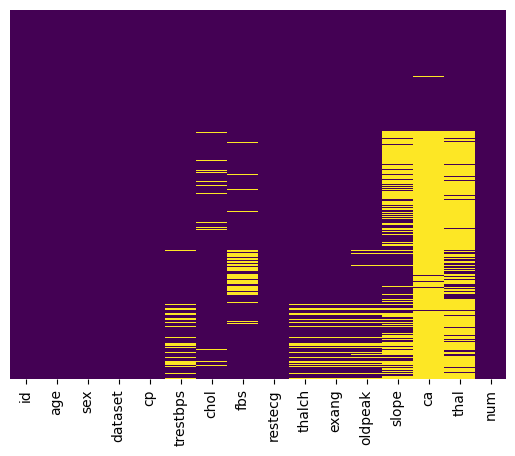

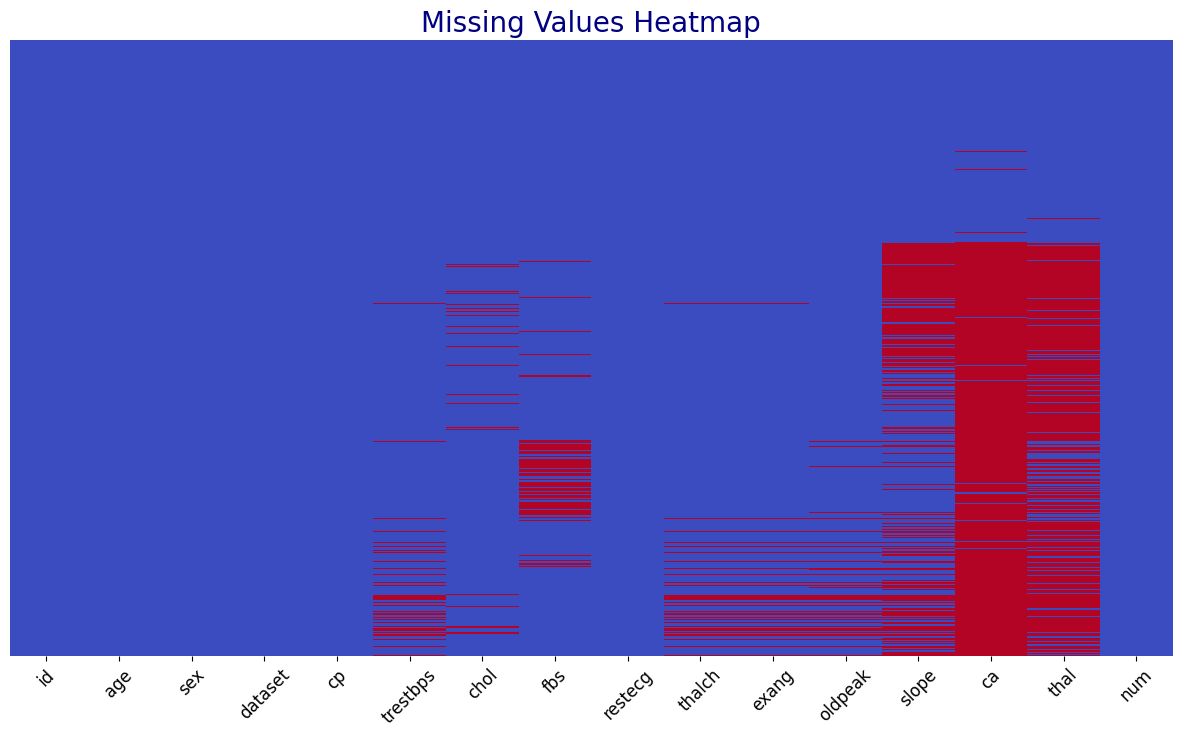

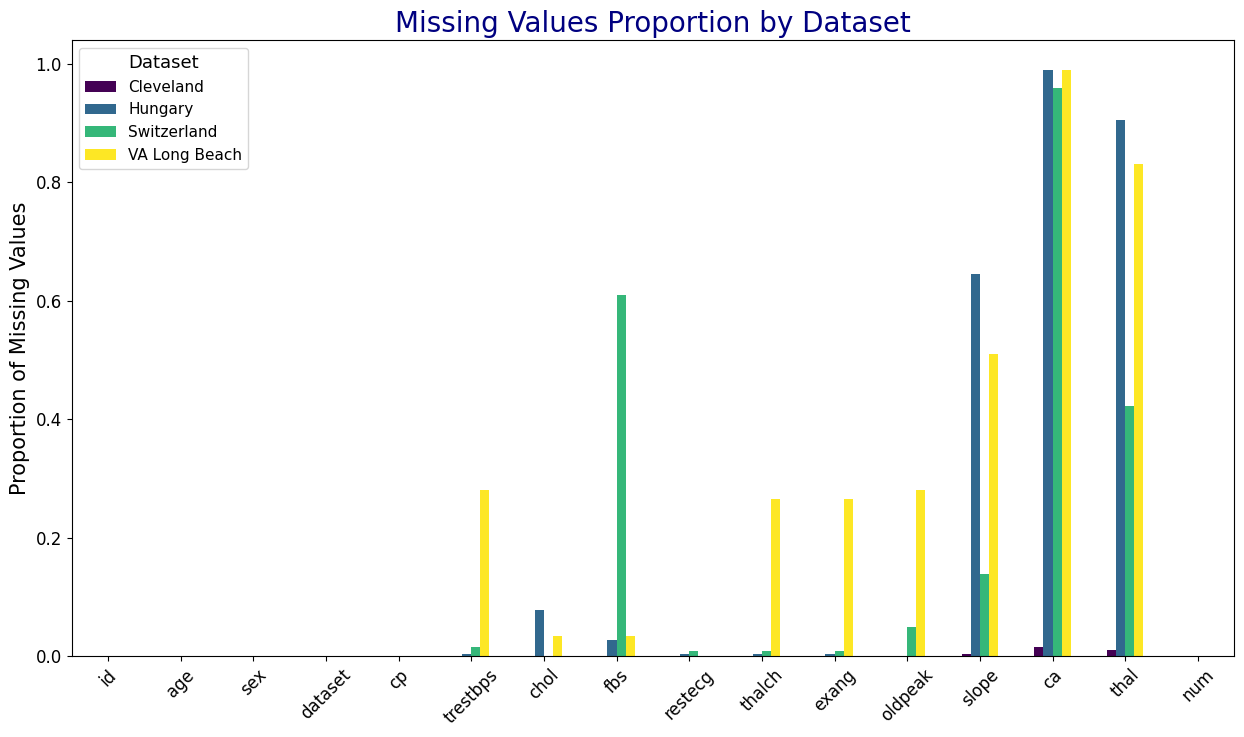

Correlation of missing values in 'ca' and 'thal' with target variable 'num':
 ca_missing      0.029535
thal_missing   -0.095111
Name: num, dtype: float64


In [12]:
#visualizing missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') 
# Let's make the visualization of missing values more informative by adding a title and adjusting the color scheme for better clarity.

plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')
plt.title('Missing Values Heatmap', fontsize=20, color='navy')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Additionally, let's explore the distribution of missing values across different datasets to understand if there's a pattern.
missing_values_by_dataset = df.groupby('dataset').apply(lambda x: x.isnull().mean()).transpose()
missing_values_by_dataset.plot(kind='bar', figsize=(15, 8), colormap='viridis')
plt.title('Missing Values Proportion by Dataset', fontsize=20, color='navy')
plt.ylabel('Proportion of Missing Values', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Dataset', title_fontsize='13', fontsize='11')
plt.show()

# Finally, let's examine the correlation between the presence of missing values in 'ca' and 'thal' columns and the target variable 'num'.
missing_values_correlation = df[['ca', 'thal', 'num']].copy()
missing_values_correlation['ca_missing'] = missing_values_correlation['ca'].isnull().astype(int)
missing_values_correlation['thal_missing'] = missing_values_correlation['thal'].isnull().astype(int)
correlation_with_target = missing_values_correlation[['ca_missing', 'thal_missing', 'num']].corr()['num'][:-1]
print("Correlation of missing values in 'ca' and 'thal' with target variable 'num':\n", correlation_with_target)




df['num'].value_counts()

In [13]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

<Axes: xlabel='num', ylabel='Count'>

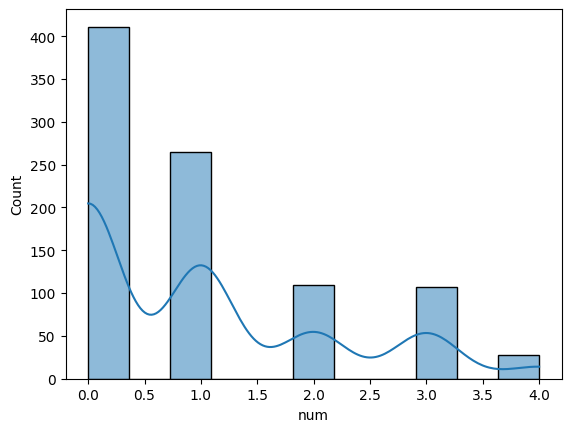

In [14]:
sns.histplot(df['num'],kde=True)

In [15]:
#age analysis

#min age and max age
df['age'].min(),df['age'].max()

(28, 77)

In [16]:
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

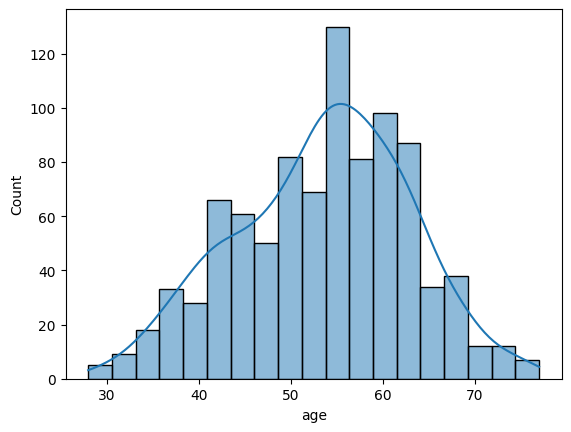

In [17]:
#age distribution

sns.histplot(df['age'],kde=True)


In [18]:

#mean of the age distribution
df['age'].mean()

53.51086956521739

In [19]:
#mode of the age distribution
df['age'].mode()

0    54
Name: age, dtype: int64

In [20]:
#data set sexes

df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [21]:
#male and female percentages
df['sex'].value_counts(normalize=True)*100

sex
Male      78.913043
Female    21.086957
Name: proportion, dtype: float64

In [22]:
fig=px.pie(df,names='sex',color='sex',)
fig.show()

In [23]:
fig=px.histogram(data_frame=df,x='age',color='sex')
fig.show()

In [24]:
df.groupby('sex')['age'].value_counts().unstack(fill_value=0)

age,28,29,30,31,32,33,34,35,36,37,...,68,69,70,71,72,73,74,75,76,77
sex,,,,,,,,,,,,,,,,,,,,,
Female,0,0,1,1,1,1,2,3,0,4,...,1,1,0,3,0,1,1,0,1,0
Male,1,3,0,1,4,1,5,8,6,7,...,9,12,7,2,4,0,6,3,1,2


In [25]:
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [26]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [27]:
px.bar(df,x='dataset',color='sex').show()



In [28]:
df.groupby('sex')['cp'].value_counts()



sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

In [29]:
color_map={'Male':'green', 'Female':'red'}

px.bar(df,x='cp',color='sex',color_discrete_map=color_map)

In [30]:
px.histogram(data_frame=df,x='age',color='dataset')


In [31]:
df.groupby('dataset')['age'].mean()

dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64

In [32]:
df.groupby('dataset')['sex'].value_counts(normalize=True)*100

dataset        sex   
Cleveland      Male      68.092105
               Female    31.907895
Hungary        Male      72.354949
               Female    27.645051
Switzerland    Male      91.869919
               Female     8.130081
VA Long Beach  Male      97.000000
               Female     3.000000
Name: proportion, dtype: float64

In [33]:
fig = px.bar(df, x='dataset', color='sex', title="Distribution of Sex Across Datasets",
             labels={"dataset": "Dataset", "sex": "Sex"},
             category_orders={"dataset": ["Cleveland", "Hungary", "Switzerland", "VA Long Beach"]},
             color_discrete_map={"Male": "blue", "Female": "magenta"})
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

# Additional analysis
# Distribution of age across datasets
fig_age = px.box(df, x='dataset', y='age', color='dataset',
                 title="Age Distribution Across Datasets",
                 labels={"dataset": "Dataset", "age": "Age"},
                 category_orders={"dataset": ["Cleveland", "Hungary", "Switzerland", "VA Long Beach"]})
fig_age.show()

# Distribution of chest pain types across datasets
fig_cp = px.histogram(df, x='dataset', color='cp',
                      title="Chest Pain Type Distribution Across Datasets",
                      labels={"dataset": "Dataset", "cp": "Chest Pain Type"},
                      category_orders={"dataset": ["Cleveland", "Hungary", "Switzerland", "VA Long Beach"], "cp": ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"]},
                      barmode='group')
fig_cp.show()

# Correlation heatmap
# Corrected to ensure only numeric columns are considered for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

fig_corr = px.imshow(corr, text_auto=True, aspect="auto",
                     title="Correlation Heatmap",
                     labels={"color": "Correlation Coefficient"})
fig_corr.show()


In [34]:
# Corrected example of label encoding if 'thal' is ordinal
category_mapping = {
    'normal': 0,
    'fixed defect': 1,
    'reversible defect': 2  # Corrected the category name here
}

# Replace 'thal' categories with their numeric codes
df['thal_encoded'] = df['thal'].map(category_mapping)

# It's possible that not all 'thal' values were mapped due to a typo or missing category,
# leading to NaN values in 'thal_encoded'. You might want to check and correct this.
# For instance, if there are NaN values in 'thal_encoded', you might need to adjust the mapping.

# After correcting the mapping, calculate the correlation again
correlation_with_num = df['thal_encoded'].corr(df['num'])

print("Correlation of 'thal_encoded' with 'num':", correlation_with_num)

Correlation of 'thal_encoded' with 'num': 0.3680590733051924


In [35]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original data
df_corrected = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'sex' column
df_corrected['sex_encoded'] = label_encoder.fit_transform(df_corrected['sex'])

# Now, you can safely drop the original 'sex' column if you no longer need it or keep it for reference
# df_corrected.drop('sex', axis=1, inplace=True)

# Check the first few rows to verify the encoding
print(df_corrected[['sex', 'sex_encoded']].head())

      sex  sex_encoded
0    Male            1
1    Male            1
2    Male            1
3    Male            1
4  Female            0


In [36]:
cp_counts=df.groupby('cp')['num'].value_counts().unstack()

<Figure size 1000x600 with 0 Axes>

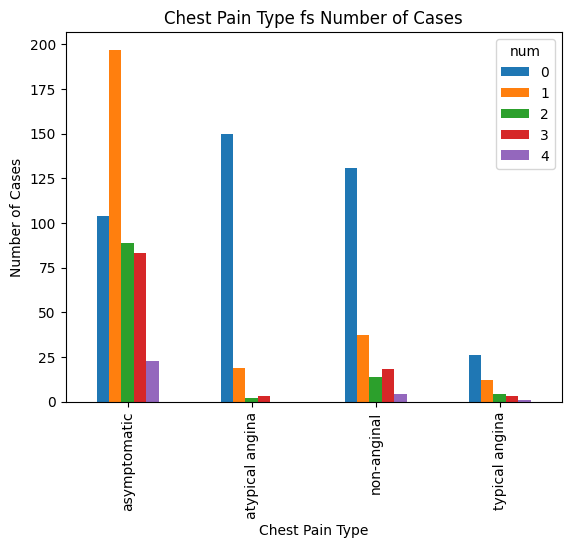

In [37]:
plt.figure(figsize=(10,6),facecolor='white')
cp_counts.plot(kind='bar')
plt.title('Chest Pain Type fs Number of Cases')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Cases')
plt.show()

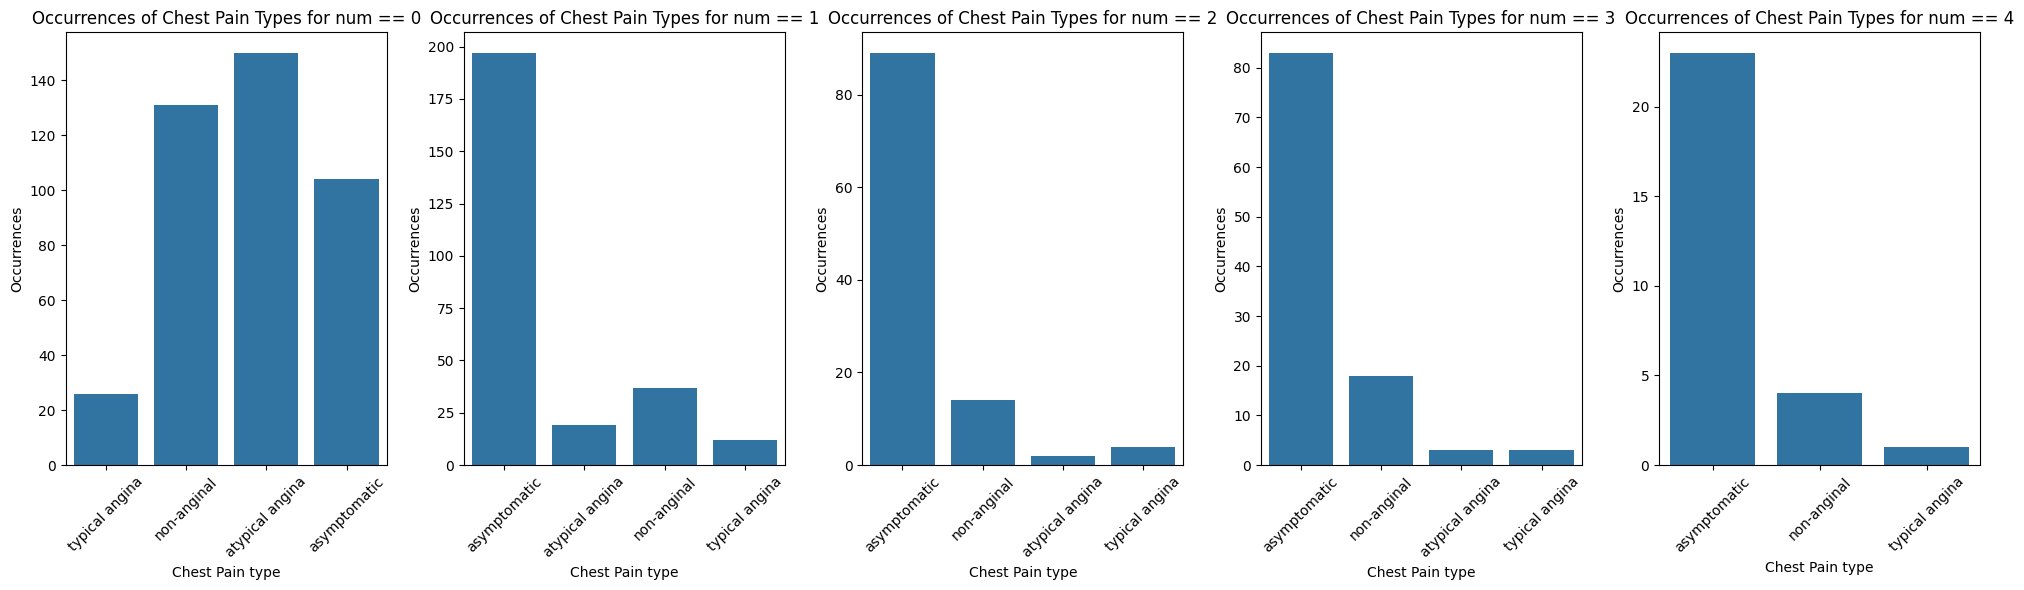

In [38]:


num_values = [0, 1, 2, 3, 4]
num_subplots = len(num_values)

fig, axes = plt.subplots(nrows=1, ncols=num_subplots, figsize=(20, 6))

for i, num in enumerate(num_values):
    sns.countplot(x='cp', data=df[df['num'] == num], ax=axes[i])
    axes[i].set_title(f'Occurrences of Chest Pain Types for num == {num}')
    axes[i].set_xlabel('Chest Pain type')
    axes[i].set_ylabel('Occurrences')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [39]:
df[df['cp']=='asymptomatic']['dataset'].value_counts(normalize=True)*100

dataset
Cleveland        29.032258
VA Long Beach    26.411290
Hungary          24.798387
Switzerland      19.758065
Name: proportion, dtype: float64

Text(0, 0.5, '')

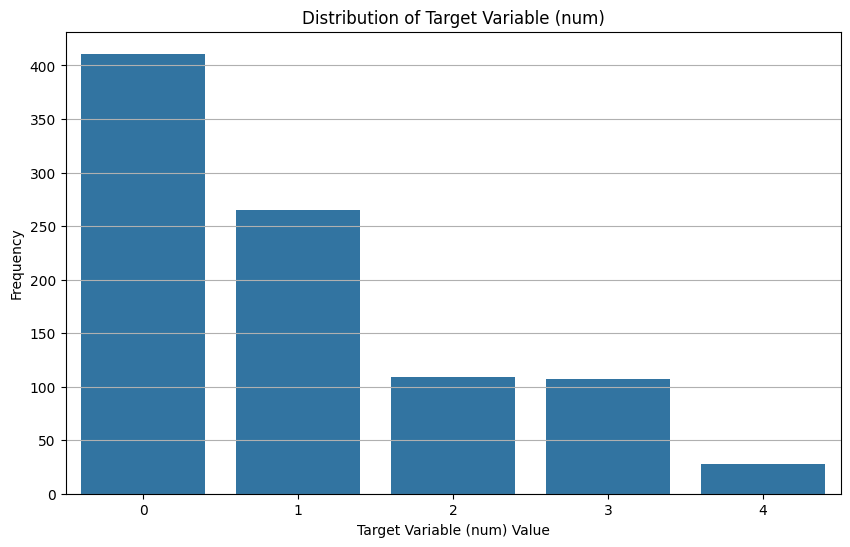

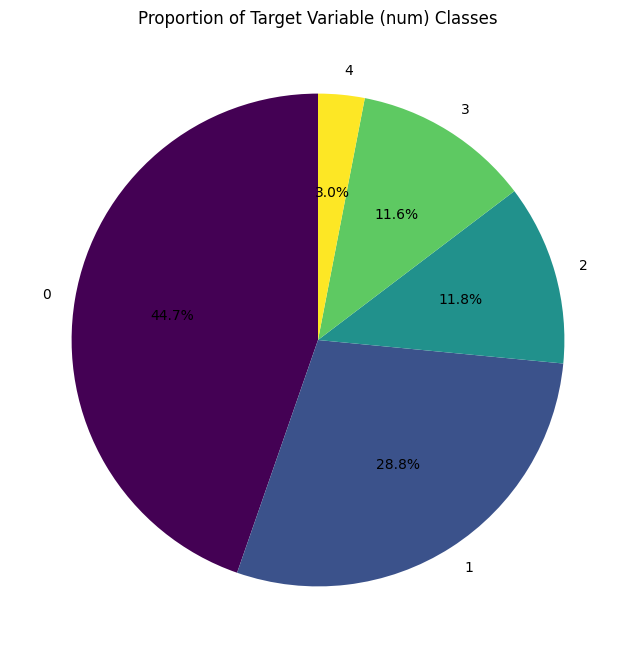

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=df)
plt.title('Distribution of Target Variable (num)')
plt.xlabel('Target Variable (num) Value')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Displaying pie chart to understand the proportion of each class
plt.figure(figsize=(8, 8))
df['num'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proportion of Target Variable (num) Classes')
plt.ylabel('')  # Corrected by hiding the y-label as it's not needed for pie chart

# Note: This dataset is imbalanced as well.


In [41]:
px.histogram(df,x='cp',color='num')

<Axes: xlabel='num', ylabel='Count'>

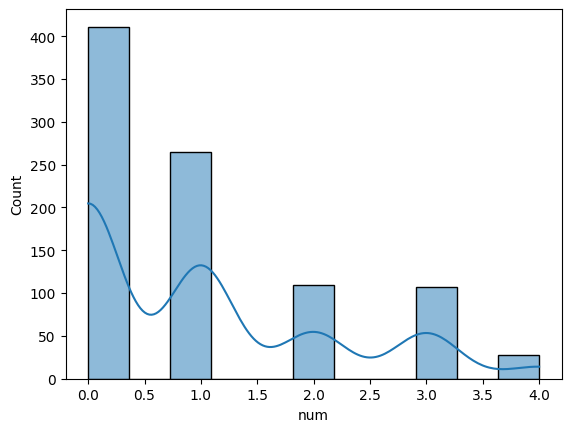

In [42]:
sns.histplot(df['num'],kde=True)



In [43]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_encoded
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,1.0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,0.0
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,NaN
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0.0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0.0


In [44]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [45]:
df['trestbps'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 920 entries, 0 to 919
Series name: trestbps
Non-Null Count  Dtype  
--------------  -----  
861 non-null    float64
dtypes: float64(1)
memory usage: 7.3 KB


In [46]:
# Calculating mean, median, and standard deviation of 'trestbps' for each 'num' class
trestbps_stats = df.groupby('num')['trestbps'].agg(['mean', 'median', 'std'])
print(trestbps_stats)


           mean  median        std
num                               
0    129.913043   130.0  16.869867
1    132.861111   130.0  19.848444
2    133.613861   134.0  17.295069
3    136.152174   135.0  24.842774
4    138.720000   136.0  22.193317


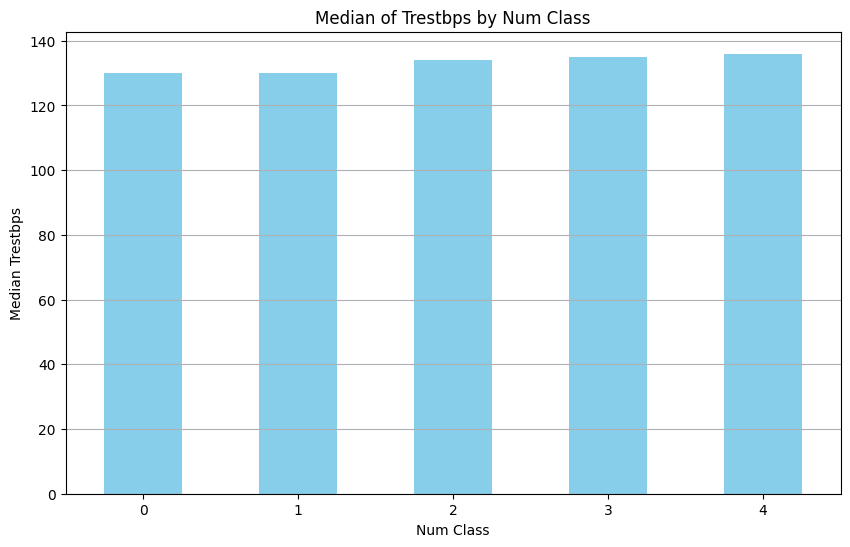

In [47]:
# Calculating median of 'trestbps' for each 'num' class and plotting
trestbps_median_by_num = df.groupby('num')['trestbps'].median()
trestbps_median_by_num.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Median of Trestbps by Num Class')
plt.xlabel('Num Class')
plt.ylabel('Median Trestbps')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [48]:
px.box(df, x='num', y='trestbps', color='num')


<Axes: xlabel='trestbps', ylabel='Count'>

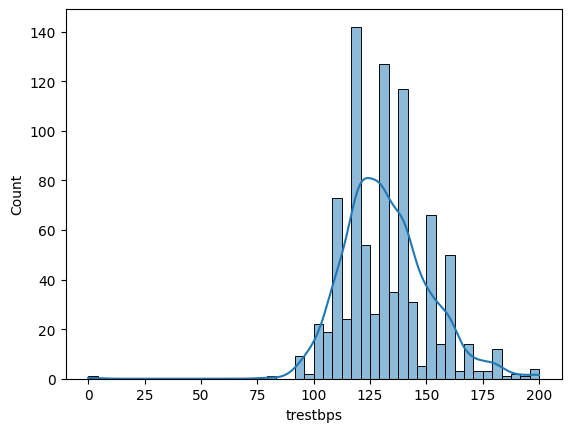

In [49]:
sns.histplot(df['trestbps'],kde=True)

In [50]:
import plotly.express as px

fig = px.histogram(df, x='trestbps', marginal='rug', hover_data=df.columns)
fig.show()


In [51]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(x=df['trestbps'], name='Histogram'))
fig.add_trace(go.Violin(x=df['trestbps'], name='KDE Plot', side='positive', points=False))
fig.update_layout(title='Histogram with KDE Plot', xaxis_title='Trestbps', yaxis_title='Count')
fig.show()

In [52]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,thal_encoded
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,1.0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,0.0
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,NaN
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0.0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0.0


In [53]:
#Cholersterol analysis
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [54]:
#mean cholesterol levels
df.groupby('num')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
num,,,,,,,,
0,392.0,227.905612,75.832760,0.0,199.00,228.0,269.00,564.0
1,258.0,195.255814,124.171544,0.0,150.75,229.0,272.75,603.0
2,107.0,143.859813,131.600915,0.0,0.00,193.0,254.00,409.0
3,106.0,159.716981,126.804894,0.0,0.00,213.0,267.75,369.0
4,27.0,192.148148,116.627845,0.0,168.00,225.0,275.00,407.0


In [55]:
#median trestbps levels
df.groupby('num')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
num,,,,,,,,
0,391.0,129.913043,16.869867,80.0,120.0,130.0,140.0,190.0
1,252.0,132.861111,19.848444,92.0,120.0,130.0,145.0,200.0
2,101.0,133.613861,17.295069,95.0,120.0,134.0,142.0,180.0
3,92.0,136.152174,24.842774,0.0,121.5,135.0,150.0,200.0
4,25.0,138.720000,22.193317,104.0,120.0,136.0,150.0,190.0


In [56]:
#visualizing num vs age 
df.groupby('num')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
num,,,,,,,,
0,411.0,50.547445,9.433700,28.0,43.00,51.0,57.00,76.0
1,265.0,53.528302,8.740371,31.0,48.00,55.0,59.00,75.0
2,109.0,57.577982,7.786852,38.0,52.00,58.0,63.00,74.0
3,107.0,59.214953,7.990594,35.0,54.00,60.0,64.50,77.0
4,28.0,59.214286,8.283661,38.0,55.75,59.0,63.25,77.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            920 non-null    int64  
 1   age           920 non-null    int64  
 2   sex           920 non-null    object 
 3   dataset       920 non-null    object 
 4   cp            920 non-null    object 
 5   trestbps      861 non-null    float64
 6   chol          890 non-null    float64
 7   fbs           830 non-null    object 
 8   restecg       918 non-null    object 
 9   thalch        865 non-null    float64
 10  exang         865 non-null    object 
 11  oldpeak       858 non-null    float64
 12  slope         611 non-null    object 
 13  ca            309 non-null    float64
 14  thal          434 non-null    object 
 15  num           920 non-null    int64  
 16  thal_encoded  242 non-null    float64
dtypes: float64(6), int64(3), object(8)
memory usage: 122.3+ KB


In [58]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Initialize an empty list to store the data
data_list = []

# Iterate over each categorical variable and get the value counts
for variable in categorical_variables:
    value_counts = df[variable].value_counts()
    data_list.extend([(variable, category, count) for category, count in value_counts.items()])
    data_list.append(("---", "---", "---"))  # Append an empty tuple to create a gap between variables

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
sex,Male,726
sex,Female,194
---,---,---
dataset,Cleveland,304
dataset,Hungary,293
dataset,VA Long Beach,200
dataset,Switzerland,123
---,---,---
cp,asymptomatic,496


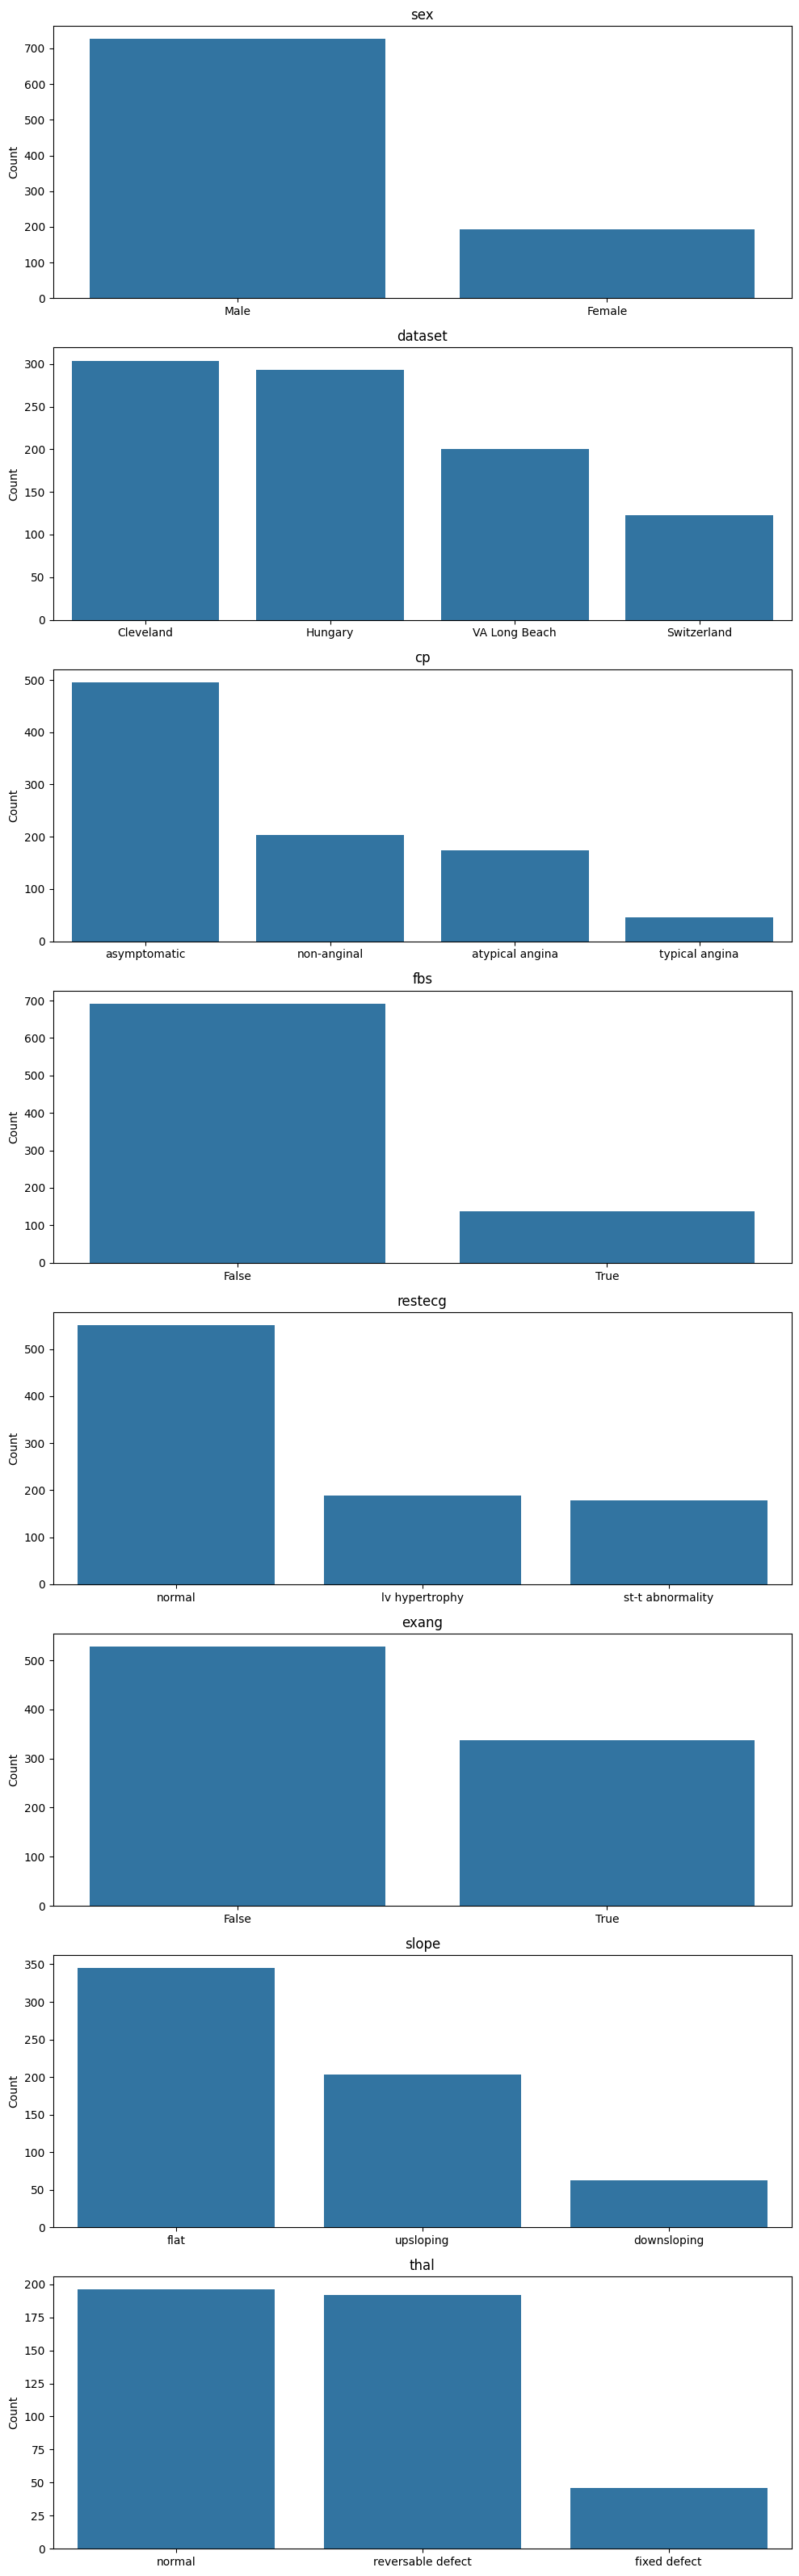

In [59]:



# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object']).columns

# Initialize an empty list to store the data
data_list = []

# Iterate over each categorical variable and get the value counts
for variable in categorical_variables:
    value_counts = df[variable].value_counts()
    data_list.extend([(variable, category, count) for category, count in value_counts.items()])
    data_list.append(("---", "---", "---"))  # Append an empty tuple to create a gap between variables

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Create subplots
num_subplots = len(categorical_variables)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 4*num_subplots))

# Iterate over each categorical variable and create a bar plot
for i, variable in enumerate(categorical_variables):
    df_variable = value_counts_df[value_counts_df['Variable'] == variable]
    sns.barplot(x='Category', y='Count', data=df_variable, ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

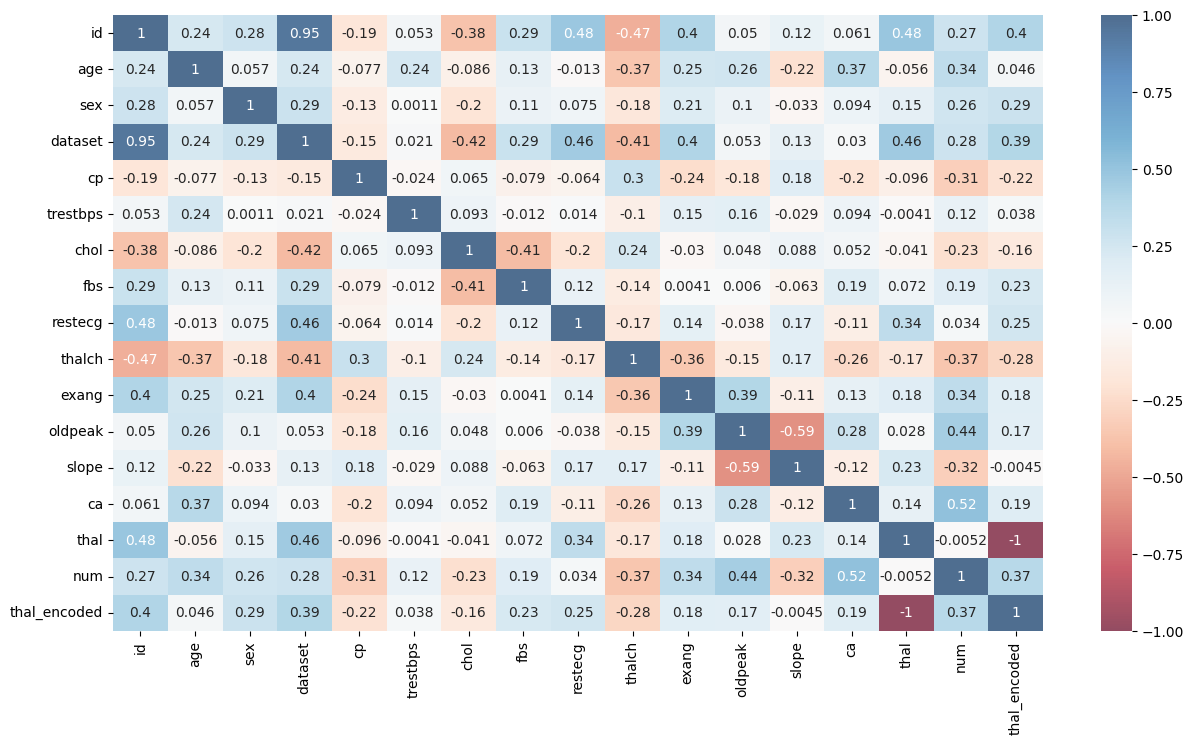

In [60]:
# plot correlation matrix after converting categorical columns to numerical
# convert categorical columns to numerical using label encoding
df2 = df.copy()
sns.set_palette("pastel")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False)
plt.show()


In [61]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix['num'].sort_values(ascending=False)
print('Correlation of each feature with the target variable')
correlation

Correlation of each feature with the target variable


num             1.000000
ca              0.516216
oldpeak         0.443084
thal_encoded    0.368059
age             0.339596
exang           0.338166
dataset         0.276203
id              0.273552
sex             0.259342
fbs             0.186664
trestbps        0.122291
restecg         0.034255
thal           -0.005170
chol           -0.231547
cp             -0.314518
slope          -0.318383
thalch         -0.366265
Name: num, dtype: float64

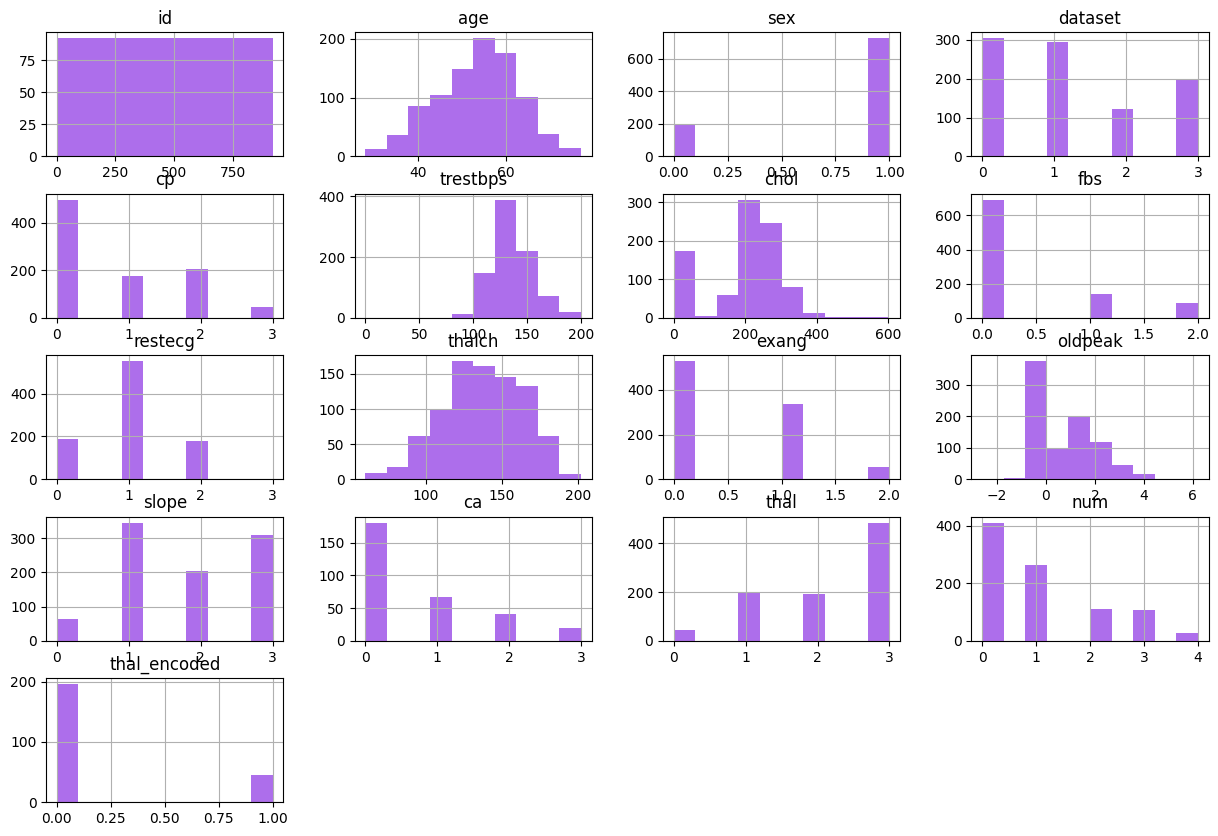

In [62]:
# plot histogram of all columns using sns
df2.hist(figsize=(15, 10), color='#8B30E3', alpha=0.7)

plt.show()

In [63]:
df.groupby('num')['ca'].value_counts().unstack()

ca,0.0,1.0,2.0,3.0
num,,,,
0,133,21,8,3
1,28,20,7,3
2,9,14,9,4
3,8,9,15,5
4,3,3,2,5


In [64]:
df.groupby('num')['thal'].value_counts().unstack()

thal,fixed defect,normal,reversable defect
num,,,
0,11,138,38
1,13,30,63
2,12,14,37
3,7,12,43
4,3,2,11


In [65]:
# Example of label encoding if 'thal' is ordinal
category_mapping = {
    'normal': 0,
    'fixed defect': 1,
    'reversible defect': 2
}

# Replace 'thal' categories with their numeric codes
df['thal_encoded'] = df['thal'].map(category_mapping)

# Calculate correlation of the newly encoded column with 'num'
df['thal_encoded'].corr(df['num'])



0.3680590733051924

In [66]:
# Displaying the percentages of the missing values in each column
print("Percentage of missing values in each column")
feature_percent = round(((df.isnull().sum() / len(df)) * 100 ).sort_values(ascending=False),2)

# add % sympbol
feature_percent = feature_percent.astype(str) + '%'
feature_percent

Percentage of missing values in each column


thal_encoded     73.7%
ca              66.41%
thal            52.83%
slope           33.59%
fbs              9.78%
oldpeak          6.74%
trestbps         6.41%
exang            5.98%
thalch           5.98%
chol             3.26%
restecg          0.22%
age               0.0%
cp                0.0%
dataset           0.0%
sex               0.0%
num               0.0%
id                0.0%
dtype: object

# Handling Missing Values

In [70]:
# Impute missing values for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_imputer = SimpleImputer(strategy='median')
df.loc[:, numerical_columns] = numerical_imputer.fit_transform(df[numerical_columns])

# Impute missing values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df.loc[:, categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Review the dataset to ensure missing values are handled
print(df.isnull().sum())

id              0
age             0
sex             0
dataset         0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalch          0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
num             0
thal_encoded    0
dtype: int64


In [71]:
# Encode categorical variables
label_encoder = LabelEncoder()
for col in categorical_columns:
    df.loc[:,col] = label_encoder.fit_transform(df[col])

# Feature Importance

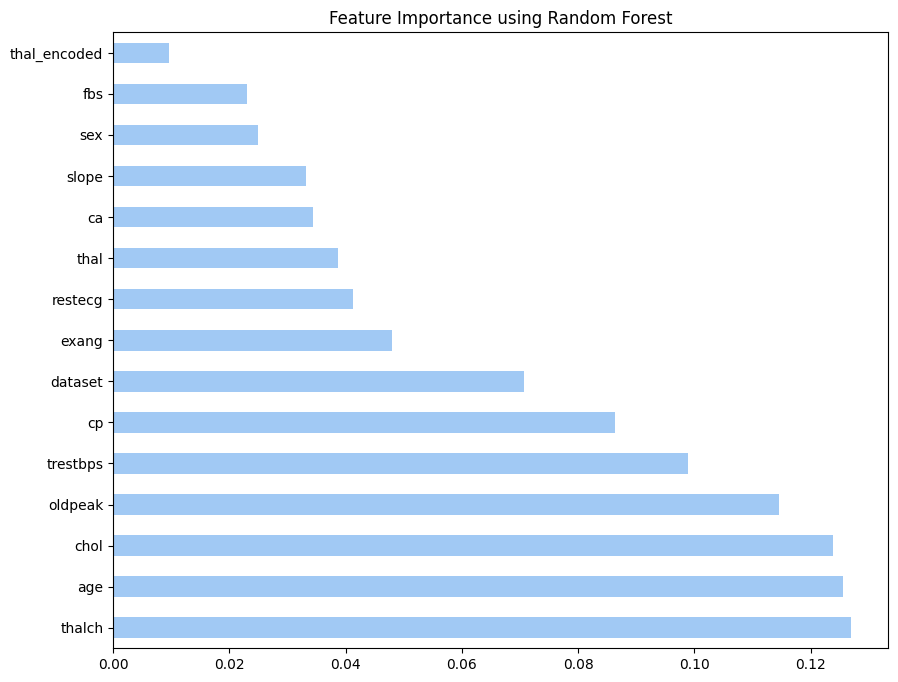

thalch          0.126980
age             0.125626
chol            0.123778
oldpeak         0.114563
trestbps        0.098903
cp              0.086362
dataset         0.070739
exang           0.047943
restecg         0.041335
thal            0.038682
ca              0.034350
slope           0.033208
sex             0.024865
fbs             0.023031
thal_encoded    0.009634
dtype: float64

In [72]:
# # Separate features and target
X = df.drop(['id', 'num'], axis=1)  # 'id' is not a feature, 'num' is the target
y = df['num']

# Apply Random Forest
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Visualize the feature importances
feature_importances_sorted = feature_importances.nlargest(X.shape[1])
feature_importances_sorted.plot(kind='barh', figsize=(10,8))
plt.title('Feature Importance using Random Forest')
plt.show()

# Return the sorted feature importances for further analysis if needed
feature_importances_sorted


In [76]:
# Apply SelectKBest class to extract top 10 features
select_k_best = SelectKBest(score_func=f_classif, k=10)
fit = select_k_best.fit(X, y)

# Get scores for each feature
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)

# Concatenate two dataframes for better visualization
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# Print the 10 best features based on ANOVA F-value
top_features = feature_scores.nlargest(10, 'Score')
top_features


,Feature,Score
9,exang,53.425924
10,oldpeak,49.976448
8,thalch,42.141220
3,cp,40.165237
0,age,31.226059
2,dataset,25.088254
1,sex,24.112502
5,chol,18.436526
12,ca,18.313573
11,slope,11.587538


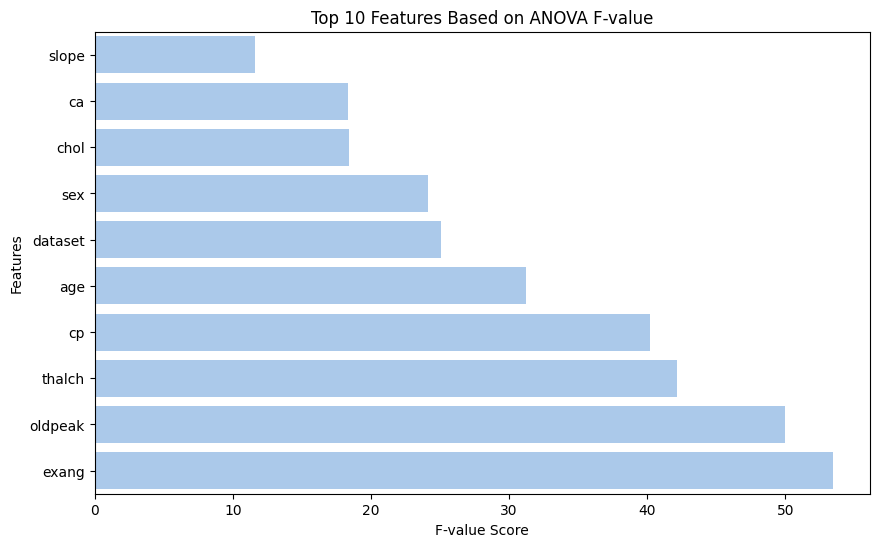

In [77]:
# Sort top features for better visualization
top_features_sorted = top_features.sort_values(by='Score', ascending=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=top_features_sorted, orient='h')

plt.title('Top 10 Features Based on ANOVA F-value')
plt.xlabel('F-value Score')
plt.ylabel('Features')

plt.show()

In [78]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)

# RFE
rfe = RFE(estimator=model, n_features_to_select=10)  # aiming to select top 10 features
fit = rfe.fit(X_scaled, y)

# Summary
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# Extracting the names of selected features
selected_features = X.columns[fit.support_]
print("Selected Features Names:", selected_features)

# Creating a DataFrame with feature names and their corresponding rankings from RFE
features_ranking = pd.DataFrame({'Feature': X.columns, 'Ranking': fit.ranking_})

# Sorting the DataFrame by ranking so the best features (with lower ranking) are at the top
features_ranking = features_ranking.sort_values('Ranking')

# Creating a color mapping based on feature selection: selected features will have a different color
default_color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

# Use the default color for selected features and grey for others
colors = [default_color if is_selected else 'grey' for is_selected in fit.support_]

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Ranking', y='Feature', data=features_ranking, palette=colors, orient='h')

plt.title('Feature Ranking by Recursive Feature Elimination (RFE)')
plt.xlabel('Ranking (Lower is Better)')
plt.ylabel('Features')

# Highlighting the selected features in the plot title or legend
num_selected_features = sum(fit.support_)
plt.legend(['Selected Features (Top 10)' if color == default_color else 'Not Selected' for color in set(colors)], loc='lower right')

plt.show()



NameError: name 'StandardScaler' is not defined

## Model Developement 


## Ensemble Models 

In [ ]:
models = {
'Random Forest Classifier': {
    'ID': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
    'params': {
        'model__n_estimators': [10, 50],
        'model__max_depth': [None, 5],
        'model__min_samples_leaf': [1, 2],
    },
},
  'XGBoost Classifier': {
    'ID': 'XGBClassifier',
    'model': XGBClassifier(),
    'params': {
        'model__max_depth': [3, 4],
        'model__learning_rate': [0.1, 0.2],
        'model__n_estimators': [100],
        'model__gamma': [0, 0.1],
        'model__reg_alpha': [0]
    },
  },

    'LGBM Classifier': {
        'ID': 'LGBMClassifier',
        'model': LGBMClassifier(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [1, 2, 3],
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1]
        }
    },


}

In [ ]:
def calculate_error_ratio(df, target_column, feature_column, test_size=0.2, random_state=42, stratify=None ):

    # Define features and target
    X = df.drop([target_column], axis=1)  # Features
    y = df[target_column]  # Target

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=stratify, test_size=test_size, random_state=random_state)

    # Calculate the percentage representation of feature_column in training and test sets
    train_percentages = X_train[feature_column].value_counts(normalize=True)*100
    test_percentages = X_test[feature_column].value_counts(normalize=True)*100

    # Calculate the error ratio
    error_ratio = abs(train_percentages - test_percentages)

    # Create a dataframe to compare the percentages
    compare_percentages = pd.DataFrame({             
            "random_train %": train_percentages,
            "random_test %": test_percentages,
            "error_ratio %": error_ratio
            })

    # Print the representation of feature_column value in training and test sets before stratified sampling
    if stratify is None:
        print(f'Representation of {feature_column} value in x_train and x_test before stratified Sampling'.upper())
    else:
        print(f'Representation of {feature_column} value in x_train and x_test after stratified Sampling'.upper())
    compare_error_df = round(compare_percentages,2)
    return  X_train, X_test, y_train, y_test, compare_error_df

In [ ]:
X_train, X_test, y_train, y_test, compare_error_df = calculate_error_ratio(df, 'num', 'ca')
compare_error_df

In [ ]:
%%time
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score

# # Define a pipeline for numerical features with a QuantileTransformer
# numerical_transformer  = Pipeline(steps=[
#   # Apply QuantileTransformer to transform numerical features to a normal distribution
#   #('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476)),
# ])

# Define a pipeline for numerical features with a QuantileTransformer
numerical_transformer = Pipeline(steps=[
    ('quantile', QuantileTransformer(random_state=42, output_distribution='normal', n_quantiles=476)),
])

# Define a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
  transformers=[
    # Apply numerical_transformer pipeline to numerical columns
    ('num', numerical_transformer, numerical_cols),
    # Detect and handle outliers in numerical columns
    ('outliers', OutlierDetector(factor=1.5), numerical_cols),
    # Apply OneHotEncoder to categorical columns
    ('cat', OneHotEncoder(), categorical_cols)
  ]
)

# Initialize a list to store model performance metrics
model_scores = []
# Initialize a variable to store the best accuracy found
best_accuracy = 0
# Initialize a variable to store the best estimator
best_estimator = None
# Dictionary to store cross-validation results
cv_res = {}
# Placeholder for numerical columns list
numerical_cols
# Placeholder for the best features selected by SelectKBest
selected_k_best = None

# Iterate over the models dictionary to train and evaluate each model
for name, model in models.items():
  # Define feature selection step using mutual information criterion
  feature_selection = SelectKBest(mutual_info_classif, k=10)
  # Define the pipeline with preprocessing, feature selection, and the model
  pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', feature_selection),
    ('model', model['model'])
  ])

  # Combine model-specific parameters with feature selection parameters
  full_params = model['params']
  full_params.update({
      # Define grid search options for 'k' in feature selection
      'feature_selection__k': [3, 5, 8, 'all']  
    })

  # Initialize GridSearchCV with the current model's pipeline and parameters
  grid = GridSearchCV(pipeline, 
    param_grid=full_params,
    cv=5, verbose=0, n_jobs=-1)

  # Fit GridSearchCV to training data
  grid.fit(X_train, y_train)

  # Retrieve the best estimator from the grid search
  best_model = grid.best_estimator_

  # Predict on the test set using the best estimator
  y_pred = best_model.predict(X_test)

  # Calculate accuracy of the predictions
  accuracy = accuracy_score(y_test, y_pred)

  # Store performance metrics for the current model
  model_scores.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted')
    })
  
  # Update best_accuracy and best_estimator if current model is better
  if accuracy > best_accuracy:  
      best_accuracy = accuracy
      best_estimator = grid.best_estimator_
      # Store cross-validation results for the best model
      cv_res[name] = grid.cv_results_

# Sort the performance metrics of models in descending order of accuracy
sorted_models = sorted(model_scores, key=lambda x: x['Accuracy'], reverse=True)
# Convert sorted model performances into a DataFrame for display
metrics = pd.DataFrame(sorted_models)

# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])



In [ ]:
# Display classification models' performance metrics
print("Classification Models Performance")
metrics.round(2)

In [ ]:
# Identify the best performing model based on accuracy
best_clf_model = max(sorted_models, key=lambda x: x['Accuracy'])

# Print the classification report of the best performing model
print("Classification Report of the Best Performing Ensemble Model:")
print(classification_report(y_test, best_estimator.predict(X_test)))

## Neural Network Implementation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report


In [ ]:
# Separate features and target variable
X = df.drop(columns=['num'])  # Features
y = df['num']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
# For simplicity, let's assume 'sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', and 'thal' are categorical
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numeric_cols = X.columns.drop(categorical_cols)

# Preprocess numerical and categorical variables separately
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the neural network model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', MLPClassifier(max_iter=500))])

# Define hyperparameters grid for tuning
# param_grid = {
#     'classifier__hidden_layer_sizes': [(100,), (100, 50), (100, 100), (50, 50)],
#     'classifier__activation': ['relu', 'logistic'],
#     'classifier__solver': ['adam', 'sgd'],
# }



param_grid = {
    'classifier__hidden_layer_sizes': [(100,), (100, 50), (100, 100), (50, 50)],
    'classifier__activation': ['relu', 'logistic'],
    'classifier__solver': ['adam', 'sgd'],
    'classifier__alpha': [0.0001, 0.001, 0.01],  
    'classifier__learning_rate': ['constant', 'adaptive'],  
    'classifier__momentum': [0.9, 0.95, 0.99],  
    'classifier__batch_size': [32, 64, 128], 
    'classifier__shuffle': [True, False],  
    'classifier__early_stopping': [True, False],  
    'classifier__validation_fraction': [0.1, 0.2, 0.3],  
    'classifier__beta_1': [0.9, 0.95, 0.99],  
}


# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))

In [ ]:

# Best parameters and best score
print("Best parameters found for Neural Network Approach:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))